In [2]:
# Code used to get my test and train data for glasses or without glasses from my google drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [3]:
# Stated the path of relevant data files
train_dir = '/content/drive/MyDrive/train'
test_dir = '/content/drive/MyDrive/test'

In [4]:
import os #Imported the OS module for directory interactions then printing the amount of data (images) in each folder
print(len(os.listdir('/content/drive/MyDrive/train/without_glasses')))
print(len(os.listdir('/content/drive/MyDrive/train/with_glasses')))
print(len(os.listdir('/content/drive/MyDrive/test/without_glasses')))
print(len(os.listdir('/content/drive/MyDrive/test/with_glasses')))

2500
2500
2380
1365


In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Created ImageDataGenerator for training set then splitted 20% of the images for validation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

# Loaded the training data then prepared it to have the images be sized 256,256 with the batch size 32
train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',  # Made it binary to classify in terms of with glasses or without glasses
    subset='training'  # specified it as a training set
)

#  ImageDataGenerator created for validation set same as the training set
validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2  # used the same amount of split as the training set
)

# Load and prepare validation data
validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary', #same as the training set
    subset='validation'  #specified it as a validation set
)

Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [9]:
#Imported the necessary modules for CNN model creation
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [10]:
# Codes to create the CNN Model

model = Sequential()

#Added 4 layers

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))  # 32 filters
#model.add(BatchNormalization())  # added to reduce overfitting
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))  # 64 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))  # 128 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(150,kernel_size=(3,3),padding='valid',activation='relu'))  # 150 filters
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

#model.add(Dropout(0.1))  # added to reduce overfitting
model.add(Dense(128,activation='relu')) #feature reduction  with 128 filters

model.add(Dense(64,activation='relu')) # 64 filters

model.add(Dense(1,activation='sigmoid'))  # Used Sigmoid for the the output layer because binary classification

In [11]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #binary_crossentropy - binary classification

In [12]:
history = model.fit(train_data, epochs=25, validation_data=validation_data)

Epoch 1/25
125/125 [==============================] - 905s 7s/step - loss: 0.3165 - accuracy: 0.8393 - val_loss: 0.8617 - val_accuracy: 0.7540
Epoch 2/25
125/125 [==============================] - 704s 6s/step - loss: 0.0546 - accuracy: 0.9845 - val_loss: 0.7120 - val_accuracy: 0.8130
Epoch 3/25
125/125 [==============================] - 677s 5s/step - loss: 0.0343 - accuracy: 0.9902 - val_loss: 0.3074 - val_accuracy: 0.8920
Epoch 4/25
125/125 [==============================] - 671s 5s/step - loss: 0.0223 - accuracy: 0.9923 - val_loss: 0.3593 - val_accuracy: 0.9130
Epoch 5/25
125/125 [==============================] - 704s 6s/step - loss: 0.0159 - accuracy: 0.9942 - val_loss: 0.6132 - val_accuracy: 0.8580
Epoch 6/25
125/125 [==============================] - 674s 5s/step - loss: 0.0149 - accuracy: 0.9942 - val_loss: 0.1361 - val_accuracy: 0.9470
Epoch 7/25
125/125 [==============================] - 693s 6s/step - loss: 0.0173 - accuracy: 0.9950 - val_loss: 0.5495 - val_accuracy: 0.8880

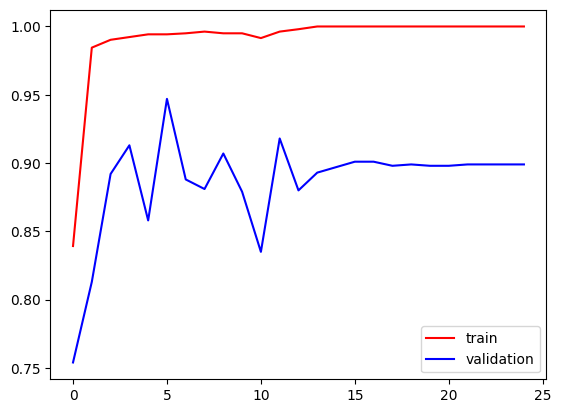

In [13]:
#importing the library responsible for visual analysis then showcasing the accuracy line plotting
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

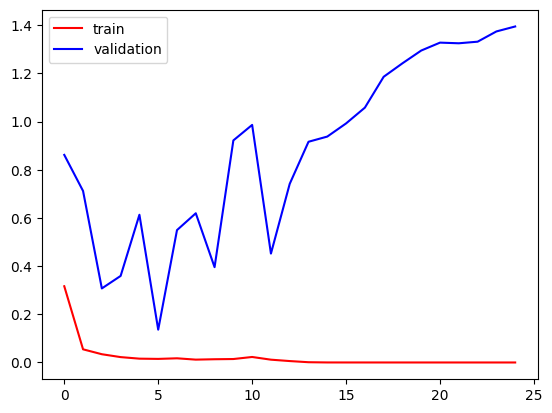

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [15]:
#To start of the testing, normalization and resizing is done as pre-processing
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 3745 images belonging to 2 classes.


In [16]:
#make prediction of the test data
predictions = model.predict(test_data)
print(predictions)

118/118 [==============================] - 875s 7s/step
[[1.0000000e+00]
 [1.0000000e+00]
 [9.0901125e-08]
 ...
 [1.0000000e+00]
 [5.5141707e-11]
 [1.0000000e+00]]


In [17]:
len(predictions) #display the length of the predictions

3745

In [18]:
#Getting the confusion matrix

from sklearn.metrics import confusion_matrix, classification_report

# Assuming you have ground truth labels (true_labels) and predicted labels (predictions)
true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  #adjusted the threshold

# Calculation of the confusion matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Printing the calculation of confusion matrix
print("Confusion Matrix:")
print(cm)

# Print the overall classification report with the labels
print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 469  896]
 [ 793 1587]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.34      0.36      1365
           1       0.64      0.67      0.65      2380

    accuracy                           0.55      3745
   macro avg       0.51      0.51      0.50      3745
weighted avg       0.54      0.55      0.54      3745



In [7]:
#To start using the pre-trained mode, import the necessary libraries with the layers, ResNet152 will be used
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet152(include_top = False, #since there's our own image of a diff dimension
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False  #all layers in the Resnet152 is not trainable
#Our own layers given:
resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

234698864/234698864 [==============================] - 10s 0us/step


In [8]:
resnet_model.summary() #showcase the pre-trained model summary

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet152 (Functional)      (None, 2048)              58370944  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 512)               1049088   
                                                                 
 dense_1 (Dense)             (None, 1)                 513       
                                                                 
Total params: 59420545 (226.67 MB)
Trainable params: 1049601 (4.00 MB)
Non-trainable params: 58370944 (222.67 MB)
_________________________________________________________________


In [9]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy']) #get the adam optimizer for the resnet model

In [10]:
history = resnet_model.fit(train_data, epochs=4, validation_data=validation_data)  #4 epochs given

Epoch 1/4
125/125 [==============================] - 3211s 25s/step - loss: 0.7941 - accuracy: 0.6967 - val_loss: 0.7820 - val_accuracy: 0.5750
Epoch 2/4
125/125 [==============================] - 3108s 25s/step - loss: 0.4408 - accuracy: 0.8043 - val_loss: 0.7793 - val_accuracy: 0.5730
Epoch 3/4
125/125 [==============================] - 3074s 25s/step - loss: 0.3913 - accuracy: 0.8307 - val_loss: 0.9781 - val_accuracy: 0.5700
Epoch 4/4
125/125 [==============================] - 3086s 25s/step - loss: 0.3641 - accuracy: 0.8440 - val_loss: 0.9708 - val_accuracy: 0.5900


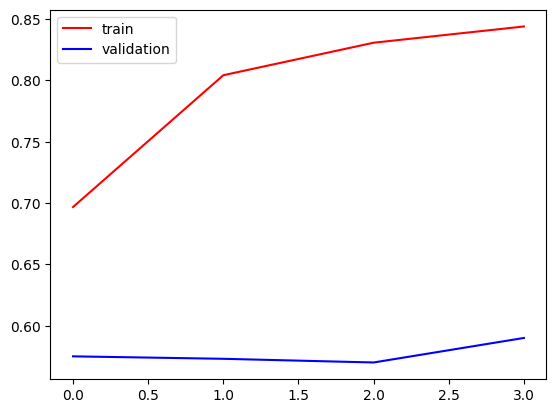

In [11]:
import matplotlib.pyplot as plt #plotting for resnet

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

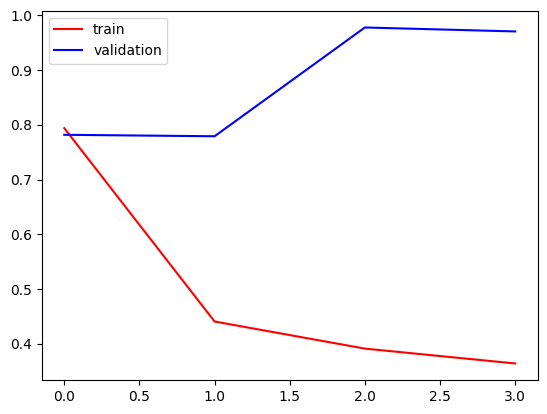

In [12]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()


In [13]:
#Testing ResNet with the data
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 3745 images belonging to 2 classes.


In [14]:
#prediction for the test data
predictions = resnet_model.predict(test_data)
print(predictions)

118/118 [==============================] - 2395s 20s/step
[[0.35270265]
 [0.90323824]
 [0.15772396]
 ...
 [0.82602835]
 [0.31500512]
 [0.67038125]]


In [15]:
len(predictions)

3745

In [16]:
from sklearn.metrics import confusion_matrix, classification_report


true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)  #  0.5 threshold

# Calculating confusion matrix for the pre-trained model
cm = confusion_matrix(true_labels, predicted_labels)

# displaying the confusion matrix alongside the classification report
print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[ 341 1024]
 [ 583 1797]]
Classification Report:
              precision    recall  f1-score   support

           0       0.37      0.25      0.30      1365
           1       0.64      0.76      0.69      2380

    accuracy                           0.57      3745
   macro avg       0.50      0.50      0.49      3745
weighted avg       0.54      0.57      0.55      3745

